#### 필요한 라이브러리 불러오기

In [1]:
import pandas as pd # 데이터 프레임
import numpy as np # 계산
import re # 정규표현식

import warnings
warnings.filterwarnings('ignore') # warning 메시지 제거

import seaborn as sns # 시각화
import graphviz # 시각화

#### 시각화를 위한 한글 폰트 설정하기

In [2]:
import matplotlib.pyplot as plt

# 한글 폰트 지정
plt.rc('font', family='AppleGothic') # 맥
# plt.rc('font', family='Malgun Gothic') # 윈도우

# 마이너스 값 깨지는 현상 해결
plt.rc('axes', unicode_minus=False)

# 레티나 디스플레이 설정
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

#### 작업 경로 지정

In [3]:
import os # wd 변경

# os로 작업 경로 지정
os.chdir('/Users/jungdayoung/Documents/GitHub/Learning_Spoons_Second_Project/data')

In [6]:
# 데이터 불러오기

df_sun = pd.read_csv('일조량.csv')
df_tomato = pd.read_csv('토마토_도매가격.csv')
df_time = pd.read_csv('날씨_시계열.csv',encoding='euc-kr')

In [7]:
# 머신러닝을 위해 도를 int 형식으로 변환을 위한 dictionary

dict_1 = {'강원도':0, '경기도':1, '인천광역시':2, '서울특별시':3, '경상북도':4, '충청북도':5, '충청남도':6, '대전광역시':7,
       '전라북도':8, '대구광역시':9, '울산광역시':10, '경상남도':11, '광주광역시':12, '부산광역시':13, '전라남도':14,
       '제주특별자치도':15}

In [8]:
# 도_num 컬럼을 dict_1을 이용하여 생성

df_tomato['도_num'] = df_tomato['도'].map(dict_1)
df_sun['도_num'] = df_sun['도'].map(dict_1)
df_time['도_num'] = df_time['도'].map(dict_1)

In [9]:
# 세 데이터 merge를 위해 일시 및 도_num으로 groupby하여 평균값 계산

df_s = df_sun.groupby(['일시','도_num']).mean().reset_index()

In [10]:
# 2013년 ~ 2014년 pm25는 측정값이 없기 때문에 날짜 컬럼을 생성하여 날짜에 따른 PM25 평균값으로 대체 

df_time[['월','일']] = df_time[['월','일']].astype('str') 

# null값 처리를 위해 날짜 컬럼 생성
df_time['날짜'] = df_time['월'] + '-' + df_time['일']

# 날짜별 PM25 평균을 구해서 df_mean에 담기
df_mean = df_time[~df_time['PM25'].isnull()].groupby('날짜')['PM25'].mean().reset_index()

# df_mean 제대로 생성되었는지 확인
df_mean

,날짜,PM25
0,1-1,31.543635
1,1-10,20.465040
2,1-11,18.676173
3,1-12,21.760050
4,1-13,27.544423
...,...,...
361,9-5,14.835991
362,9-6,19.890643
363,9-7,23.379872
364,9-8,21.854647


In [11]:
# 날짜를 키로 PM25를 value로 딕셔러니 생성
fill_na = dict(zip(df_mean['날짜'],df_mean['PM25']))

# PM25의 null값들을 dictionary value로 채움
df_time.loc[df_time['PM25'].isnull(), 'PM25'] = df_time['날짜'].map(fill_na)

In [12]:
# merge를 위해 날짜 컬럼 drop
df_time = df_time.drop('날짜',axis=1)

In [13]:
# merge를 위해 다른 두 데이터에는 없는 세종시를 충청남도에 포함
df_time.loc[df_time['도'].str.contains('세종'),'도'] = '충청남도'

df_time[df_time['도'] == '충청남도'].tail()

,도,일시,연도,월,일,SO2,CO,O3,NO2,PM10,PM25,도_num
720438,충청남도,2018-12-27,2018,12,27,0.002917,0.354167,0.027833,0.006083,14.875000,8.130435,6.0
720439,충청남도,2018-12-28,2018,12,28,0.003000,0.454167,0.019333,0.012500,24.500000,16.130435,6.0
720440,충청남도,2018-12-29,2018,12,29,0.003500,0.441667,0.023000,0.010958,27.958333,12.500000,6.0
720441,충청남도,2018-12-30,2018,12,30,0.004125,0.570833,0.017292,0.016667,30.041667,21.833333,6.0
720442,충청남도,2018-12-31,2018,12,31,0.004708,0.916667,0.007208,0.032500,57.583333,46.869565,6.0


In [14]:
# merge를 위해 일시 및 도_num으로 groupby하여 평균값 계산
df_t = df_time.groupby(['일시','도_num']).mean().reset_index()

# groupby 되었는지 확인
df_t

,일시,도_num,연도,SO2,CO,O3,NO2,PM10,PM25
0,2013-01-01,0.0,2013,0.007216,0.770076,0.020583,0.018420,45.132576,31.543635
1,2013-01-01,1.0,2013,0.006340,0.649199,0.013143,0.031923,44.532051,31.543635
2,2013-01-01,2.0,2013,0.007477,0.713492,0.013913,0.030154,39.626984,31.543635
3,2013-01-01,3.0,2013,0.005741,0.658125,0.008458,0.043541,38.334375,31.543635
4,2013-01-01,4.0,2013,0.006363,0.739583,0.015653,0.017980,48.280093,31.543635
...,...,...,...,...,...,...,...,...,...
32860,2018-12-31,10.0,2018,0.003241,0.502206,0.018193,0.023311,22.787681,12.066176
32861,2018-12-31,11.0,2018,0.003150,0.475868,0.017313,0.022639,29.648866,19.518839
32862,2018-12-31,12.0,2018,0.003204,0.605093,0.015468,0.027125,34.759259,22.728704
32863,2018-12-31,13.0,2018,0.004119,0.373418,0.014718,0.027532,28.525591,15.960829


In [15]:
# merge를 위해 월,일 컬럼 drop
df_s = df_s.drop(['월','일'],axis=1)

In [16]:
# drop 되었는지 확인
df_s

,일시,도_num,연도,합계 일조시간(hr)
0,2013-01-01,0,2013,3.115385
1,2013-01-01,1,2013,3.800000
2,2013-01-01,2,2013,5.533333
3,2013-01-01,3,2013,4.600000
4,2013-01-01,4,2013,2.686667
...,...,...,...,...
35051,2018-12-31,11,2018,5.921429
35052,2018-12-31,12,2018,9.200000
35053,2018-12-31,13,2018,5.700000
35054,2018-12-31,14,2018,8.471429


In [17]:
# 일조량 데이터와 대기오염 데이터 merge
df_air = pd.merge(df_t,df_s,on=['일시','도_num','연도'])

In [18]:
# 데이터 타입 확인
df_air.dtypes

일시              object
도_num          float64
연도               int64
SO2            float64
CO             float64
O3             float64
NO2            float64
PM10           float64
PM25           float64
합계 일조시간(hr)    float64
dtype: object

In [19]:
# merge가 맞게 되었는지 확인
df_air

,일시,도_num,연도,SO2,CO,O3,NO2,PM10,PM25,합계 일조시간(hr)
0,2013-01-01,0.0,2013,0.007216,0.770076,0.020583,0.018420,45.132576,31.543635,3.115385
1,2013-01-01,1.0,2013,0.006340,0.649199,0.013143,0.031923,44.532051,31.543635,3.800000
2,2013-01-01,2.0,2013,0.007477,0.713492,0.013913,0.030154,39.626984,31.543635,5.533333
3,2013-01-01,3.0,2013,0.005741,0.658125,0.008458,0.043541,38.334375,31.543635,4.600000
4,2013-01-01,4.0,2013,0.006363,0.739583,0.015653,0.017980,48.280093,31.543635,2.686667
...,...,...,...,...,...,...,...,...,...,...
32860,2018-12-31,10.0,2018,0.003241,0.502206,0.018193,0.023311,22.787681,12.066176,6.600000
32861,2018-12-31,11.0,2018,0.003150,0.475868,0.017313,0.022639,29.648866,19.518839,5.921429
32862,2018-12-31,12.0,2018,0.003204,0.605093,0.015468,0.027125,34.759259,22.728704,9.200000
32863,2018-12-31,13.0,2018,0.004119,0.373418,0.014718,0.027532,28.525591,15.960829,5.700000


In [20]:
# 토마토 가격데이터와 기상 데이터 merge (최종 데이터)
df_tomatoma = pd.merge(df_air,df_tomato,on=['일시','도_num','연도'],how='left')

df_tomatoma.head()

,일시,도_num,연도,SO2,CO,O3,NO2,PM10,PM25,합계 일조시간(hr),품종명,도,마켓명,날짜,가격,월,일,연월
0,2013-01-01,0.0,2013,0.007216,0.770076,0.020583,0.018420,45.132576,31.543635,3.115385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-01,1.0,2013,0.006340,0.649199,0.013143,0.031923,44.532051,31.543635,3.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-01-01,2.0,2013,0.007477,0.713492,0.013913,0.030154,39.626984,31.543635,5.533333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-01-01,3.0,2013,0.005741,0.658125,0.008458,0.043541,38.334375,31.543635,4.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-01-01,4.0,2013,0.006363,0.739583,0.015653,0.017980,48.280093,31.543635,2.686667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# 품종명은 토마토 밖에 없기때문에 토마토(10kg)로 nan값 채우기
df_tomatoma['품종명'] = df_tomatoma['품종명'].fillna('토마토(10kg)')

In [22]:
# 위에 생성된 dictionary의 key값과 value값 변경
dict_reversed = {v: k for k, v in dict_1.items()}

In [23]:
# float 타입으로 되어있는 도_num int값으로 변경
df_tomatoma['도_num'] = df_tomatoma['도_num'].astype('int')

In [24]:
# dict_reverse를 이용하여 도 컬럼 생성
df_tomatoma.loc[df_tomatoma['도'].isnull(),'도'] = df_tomatoma['도_num'].map(dict_reversed)

In [25]:
# 가격이 없는 일시는 장이 안선 날이기때문에 가격이 null아닌 일시만 list로 변환
change_list = list(df_tomatoma.loc[~df_tomatoma['가격'].isnull(),'일시'].unique())

# list에 있는 값 확인
change_list

['2013-01-02',
 '2013-01-03',
 '2013-01-04',
 '2013-01-07',
 '2013-01-08',
 '2013-01-09',
 '2013-01-10',
 '2013-01-11',
 '2013-01-14',
 '2013-01-15',
 '2013-01-16',
 '2013-01-17',
 '2013-01-18',
 '2013-01-21',
 '2013-01-22',
 '2013-01-23',
 '2013-01-24',
 '2013-01-25',
 '2013-01-28',
 '2013-01-29',
 '2013-01-30',
 '2013-01-31',
 '2013-02-01',
 '2013-02-04',
 '2013-02-05',
 '2013-02-06',
 '2013-02-07',
 '2013-02-08',
 '2013-02-12',
 '2013-02-13',
 '2013-02-14',
 '2013-02-15',
 '2013-02-18',
 '2013-02-19',
 '2013-02-20',
 '2013-02-21',
 '2013-02-22',
 '2013-02-25',
 '2013-02-26',
 '2013-02-27',
 '2013-02-28',
 '2013-03-04',
 '2013-03-05',
 '2013-03-06',
 '2013-03-07',
 '2013-03-08',
 '2013-03-11',
 '2013-03-12',
 '2013-03-13',
 '2013-03-14',
 '2013-03-15',
 '2013-03-18',
 '2013-03-19',
 '2013-03-20',
 '2013-03-21',
 '2013-03-22',
 '2013-03-25',
 '2013-03-26',
 '2013-03-27',
 '2013-03-28',
 '2013-03-29',
 '2013-04-01',
 '2013-04-02',
 '2013-04-03',
 '2013-04-04',
 '2013-04-05',
 '2013-04-

In [26]:
# change_list에 있는 일시만으로 새로운 데이터 프레임 생성
df_tomatoma_final = df_tomatoma[df_tomatoma['일시'].isin(change_list)].copy()

In [27]:
# 현재 안 쓸 컬럼들 드랍
df_tomatoma_final = df_tomatoma_final.drop(['날짜','월','일','연월'],axis=1)

In [28]:
# 가격이 nan인 값들을 권역을 설정하여 채워주기 위해 리스트 생성

광주_lst = ['광주광역시','전라북도','전라남도','제주도']
대구_lst = ['대구광역시','경상북도']
부산_lst = ['부산광역시','경상남도','울산광역시']
대전_lst = ['대전광역시','충청북도','충청남도']
서울_lst = ['서울특별시','경기도','강원도','인천광역시']

In [29]:
# nan값을 채우기 위해 interpolate의  time method를 사용하기 위해 일시를 date type으로 변경
df_tomatoma_final['일시']=pd.to_datetime(df_tomatoma_final['일시'])

In [30]:
# 일시를 index로 변경
df_tomatoma_final = df_tomatoma_final.set_index('일시')

# 변경이 되었는지 확인
df_tomatoma_final

,도_num,연도,SO2,CO,O3,NO2,PM10,PM25,합계 일조시간(hr),품종명,도,마켓명,가격
일시,,,,,,,,,,,,,
2013-01-02,0,2013,0.005504,0.503030,0.030148,0.009233,35.018939,37.602906,8.300000,토마토(10kg),강원도,NaN,NaN
2013-01-02,1,2013,0.005632,0.417254,0.023083,0.018736,24.678419,37.602906,8.820000,토마토(10kg),경기도,NaN,NaN
2013-01-02,2,2013,0.006906,0.467460,0.024183,0.014894,24.450397,37.602906,6.133333,토마토(10kg),인천광역시,NaN,NaN
2013-01-02,3,2013,0.004950,0.403021,0.024425,0.021413,18.644792,37.602906,9.100000,토마토(10kg),서울특별시,가락도매,29000.0
2013-01-02,4,2013,0.005591,0.567593,0.025477,0.011117,44.833333,37.602906,7.980000,토마토(10kg),경상북도,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31,10,2018,0.003241,0.502206,0.018193,0.023311,22.787681,12.066176,6.600000,토마토(10kg),울산광역시,NaN,NaN
2018-12-31,11,2018,0.003150,0.475868,0.017313,0.022639,29.648866,19.518839,5.921429,토마토(10kg),경상남도,NaN,NaN
2018-12-31,12,2018,0.003204,0.605093,0.015468,0.027125,34.759259,22.728704,9.200000,토마토(10kg),광주광역시,각화도매,31000.0


In [31]:
# 각 권역당 일시가 같으면 그 일시에 가격 값이 있는것으로 nan 채우기 위한 함수

def fill_price(lst):
    df_tomatoma_final.loc[df_tomatoma_final['도'].isin(lst),'가격'] = df_tomatoma_final.loc[
        df_tomatoma_final['도'].isin(lst),'가격'].interpolate(method='time',limit_direction='both')
    return df_tomatoma_final.loc[df_tomatoma_final['도'].isin(lst),'가격']


In [32]:
# 각 권역의 마켓명이 같을 것이라고 가정하여 fillna의 bfill을 사용하여 마켓명 채우기 위한 함수

def fill_market(lst):
    df_tomatoma_final.loc[df_tomatoma_final['도'].isin(lst),'마켓명'] =  df_tomatoma_final.loc[
        df_tomatoma_final['도'].isin(lst),'마켓명'].fillna(method='bfill')
    return df_tomatoma_final.loc[df_tomatoma_final['도'].isin(lst),'마켓명']

In [33]:
# 함수를 활용하여 '마켓명' nan값 처리
fill_market(광주_lst)
fill_market(대구_lst)
fill_market(부산_lst)
fill_market(대전_lst)
fill_market(서울_lst)

일시
2013-01-02    가락도매
2013-01-02    가락도매
2013-01-02    가락도매
2013-01-02    가락도매
2013-01-03    가락도매
              ... 
2018-12-28    가락도매
2018-12-31    가락도매
2018-12-31    가락도매
2018-12-31    가락도매
2018-12-31    가락도매
Name: 마켓명, Length: 5888, dtype: object

In [34]:
#함수를 활용하여 '가격' 값 처리
fill_price(대구_lst)
fill_price(광주_lst)
fill_price(부산_lst)
fill_price(대전_lst)
fill_price(서울_lst)

일시
2013-01-02    29000.0
2013-01-02    29000.0
2013-01-02    29000.0
2013-01-02    29000.0
2013-01-03    30000.0
               ...   
2018-12-28    26000.0
2018-12-31    25000.0
2018-12-31    25000.0
2018-12-31    25000.0
2018-12-31    25000.0
Name: 가격, Length: 5888, dtype: float64

In [35]:
#함수를 사용하였지만 값이 안들어간 마켓명이 존재하여 하드코딩으로 값 채움
df_tomatoma_final.loc[df_tomatoma_final['마켓명'].isnull(),'마켓명'] = '각화도매'

In [36]:
df_tomatoma_final = df_tomatoma_final.reset_index()
df_tomatoma_final

,일시,도_num,연도,SO2,CO,O3,NO2,PM10,PM25,합계 일조시간(hr),품종명,도,마켓명,가격
0,2013-01-02,0,2013,0.005504,0.503030,0.030148,0.009233,35.018939,37.602906,8.300000,토마토(10kg),강원도,가락도매,29000.0
1,2013-01-02,1,2013,0.005632,0.417254,0.023083,0.018736,24.678419,37.602906,8.820000,토마토(10kg),경기도,가락도매,29000.0
2,2013-01-02,2,2013,0.006906,0.467460,0.024183,0.014894,24.450397,37.602906,6.133333,토마토(10kg),인천광역시,가락도매,29000.0
3,2013-01-02,3,2013,0.004950,0.403021,0.024425,0.021413,18.644792,37.602906,9.100000,토마토(10kg),서울특별시,가락도매,29000.0
4,2013-01-02,4,2013,0.005591,0.567593,0.025477,0.011117,44.833333,37.602906,7.980000,토마토(10kg),경상북도,북부도매,29000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22075,2018-12-31,10,2018,0.003241,0.502206,0.018193,0.023311,22.787681,12.066176,6.600000,토마토(10kg),울산광역시,엄궁도매,30000.0
22076,2018-12-31,11,2018,0.003150,0.475868,0.017313,0.022639,29.648866,19.518839,5.921429,토마토(10kg),경상남도,엄궁도매,30000.0
22077,2018-12-31,12,2018,0.003204,0.605093,0.015468,0.027125,34.759259,22.728704,9.200000,토마토(10kg),광주광역시,각화도매,31000.0
22078,2018-12-31,13,2018,0.004119,0.373418,0.014718,0.027532,28.525591,15.960829,5.700000,토마토(10kg),부산광역시,엄궁도매,30000.0


#### 기초통계

In [44]:
df_tomatoma_g = df_tomatoma_final[df_tomatoma_final['연도'] != 2018]
df_tomatoma_g.tail()

,일시,도_num,연도,SO2,CO,O3,NO2,PM10,PM25,합계 일조시간(hr),품종명,도,마켓명,가격
18415,2017-12-29,10,2017,0.004550,0.930384,0.023088,0.033774,81.213251,41.930678,8.300000,토마토(10kg),울산광역시,엄궁도매,21000.0
18416,2017-12-29,11,2017,0.004742,0.748507,0.021643,0.028905,81.940972,39.022832,6.742857,토마토(10kg),경상남도,엄궁도매,21000.0
18417,2017-12-29,12,2017,0.003583,0.828460,0.008503,0.040649,83.175926,59.228704,0.100000,토마토(10kg),광주광역시,각화도매,22000.0
18418,2017-12-29,13,2017,0.004547,0.500735,0.020633,0.032862,88.154762,60.079365,8.300000,토마토(10kg),부산광역시,엄궁도매,21000.0
18419,2017-12-29,14,2017,0.004979,0.731250,0.024893,0.021241,60.396610,35.690363,3.835714,토마토(10kg),전라남도,각화도매,22000.0


In [177]:
df_tomatoma_gg = df_tomatoma_g.copy()

In [182]:
df_tomatoma_gg['일시'] = df_tomatoma_gg['일시'].astype(str)
df_tomatoma_gg['일시']

0        2013-01-02
1        2013-01-02
2        2013-01-02
3        2013-01-02
4        2013-01-02
            ...    
18415    2017-12-29
18416    2017-12-29
18417    2017-12-29
18418    2017-12-29
18419    2017-12-29
Name: 일시, Length: 18420, dtype: object

In [186]:
df_tomatoma_gg['연월'] = df_tomatoma_gg['일시'].str.split('-').str.get(0) + '-' + df_tomatoma_gg['일시'].str.split('-').str.get(1)
df_tomatoma_gg.head()


,일시,도_num,연도,SO2,CO,O3,NO2,PM10,PM25,합계 일조시간(hr),품종명,도,마켓명,가격,연월
0,2013-01-02,0,2013,0.005504,0.503030,0.030148,0.009233,35.018939,37.602906,8.300000,토마토(10kg),강원도,가락도매,29000.0,2013-01
1,2013-01-02,1,2013,0.005632,0.417254,0.023083,0.018736,24.678419,37.602906,8.820000,토마토(10kg),경기도,가락도매,29000.0,2013-01
2,2013-01-02,2,2013,0.006906,0.467460,0.024183,0.014894,24.450397,37.602906,6.133333,토마토(10kg),인천광역시,가락도매,29000.0,2013-01
3,2013-01-02,3,2013,0.004950,0.403021,0.024425,0.021413,18.644792,37.602906,9.100000,토마토(10kg),서울특별시,가락도매,29000.0,2013-01
4,2013-01-02,4,2013,0.005591,0.567593,0.025477,0.011117,44.833333,37.602906,7.980000,토마토(10kg),경상북도,북부도매,29000.0,2013-01


In [45]:
df_tomatoma_g.columns

Index(['일시', '도_num', '연도', 'SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25',
       '합계 일조시간(hr)', '품종명', '도', '마켓명', '가격'],
      dtype='object')

In [46]:
df_tomatoma_g[['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25',
       '합계 일조시간(hr)', '가격']].describe()

,SO2,CO,O3,NO2,PM10,PM25,합계 일조시간(hr),가격
count,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000
mean,0.004593,0.495508,0.027211,0.021671,45.963743,25.080816,6.457343,26356.568947
std,0.002065,0.172389,0.011875,0.010336,23.639258,9.099791,3.776496,7888.600006
min,0.001027,0.147096,0.001400,0.003974,6.583333,3.304003,0.000000,10000.000000
25%,0.003222,0.377579,0.018733,0.013975,30.340954,18.591486,3.300000,19000.000000
50%,0.004247,0.459275,0.026069,0.019352,41.644264,23.988369,7.296667,27000.000000
75%,0.005537,0.572502,0.034854,0.027137,56.230168,30.321535,9.433333,32000.000000
max,0.024909,1.727652,0.083800,0.082172,555.692308,101.494905,13.900000,48000.000000


#### 토마토 도매 가격

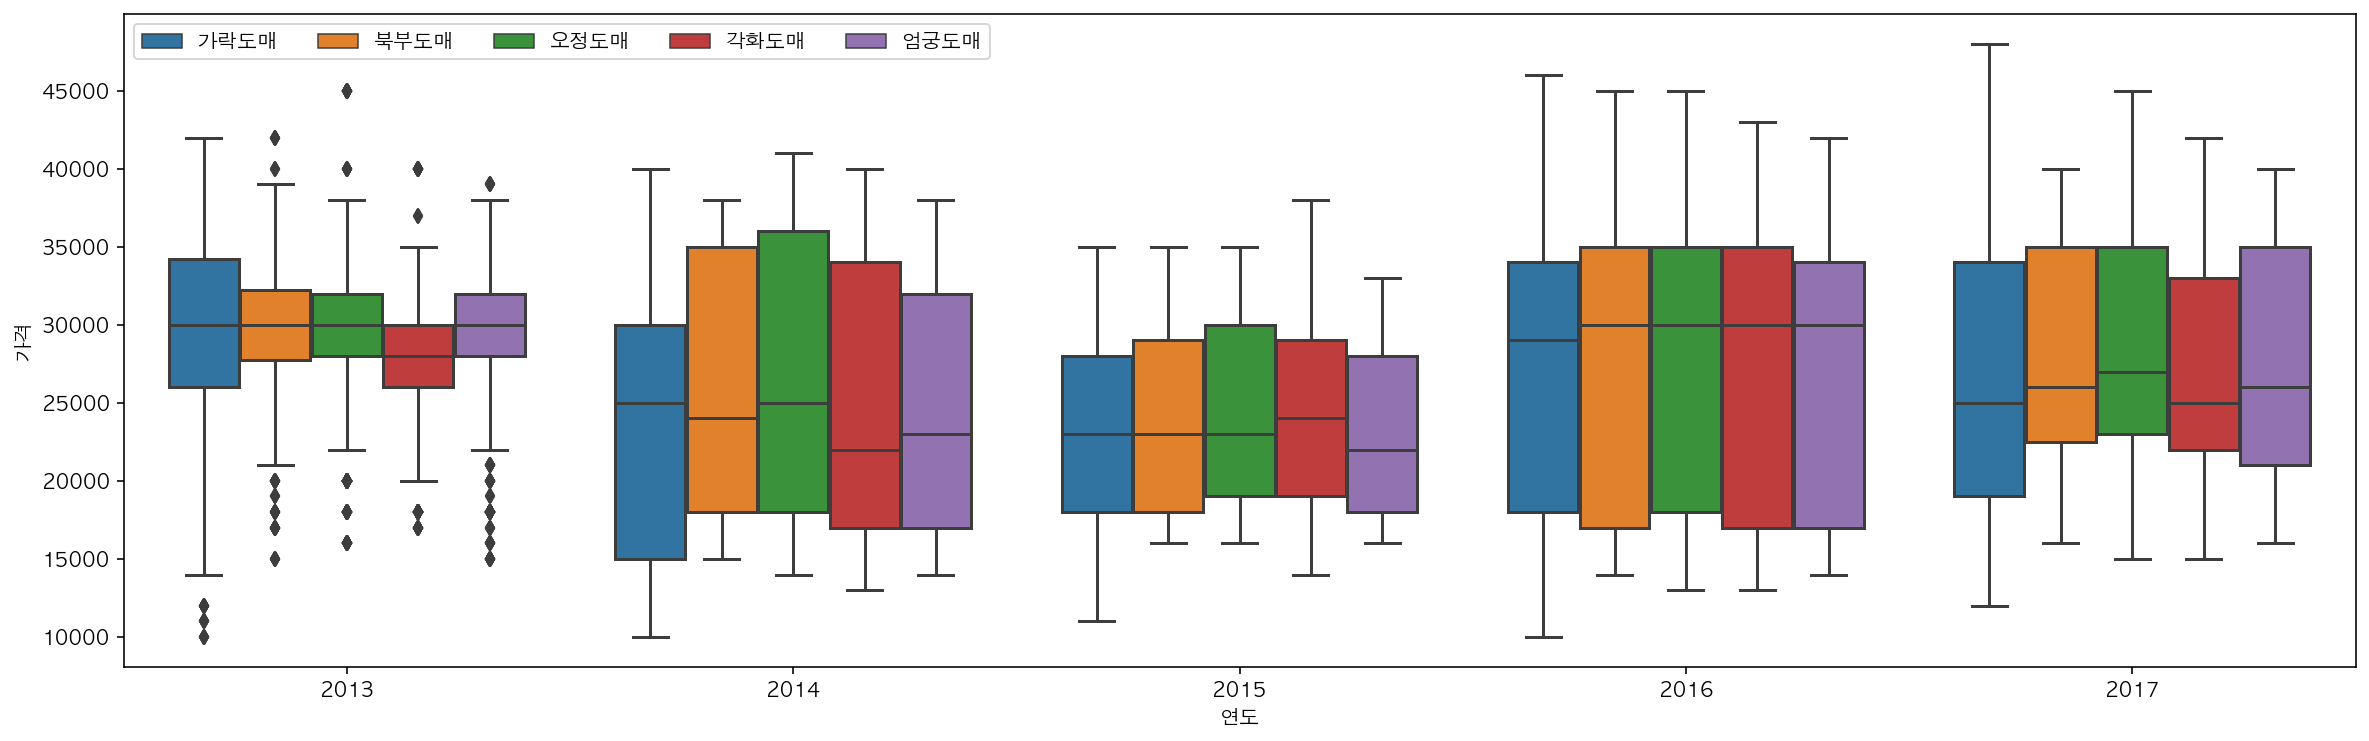

In [95]:
plt.figure(figsize=(20,6))
sns.boxplot(data=df_tomatoma_g, x='연도', y='가격', hue='마켓명').legend(ncol=5)


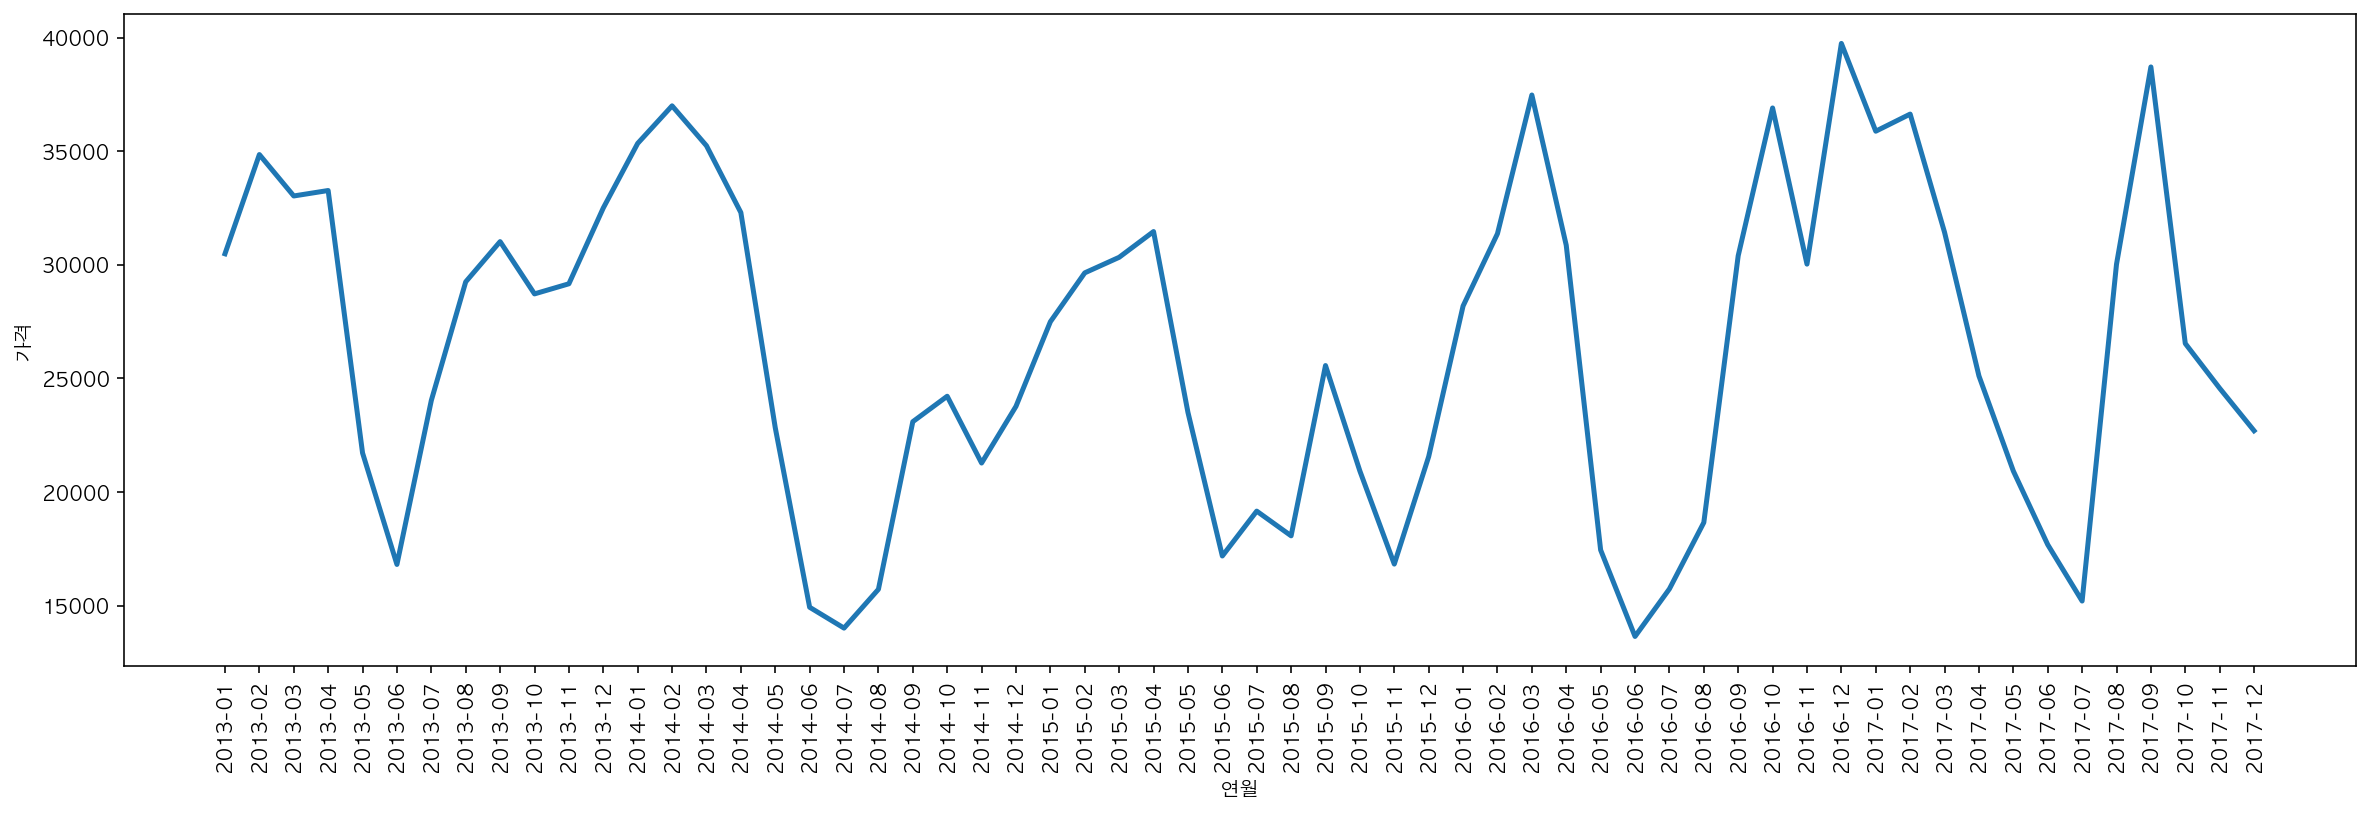

In [854]:
plt.figure(figsize=(20,6))
s = plt.xticks(rotation=90)
sns.lineplot(data=df_tomatoma_gg, x='연월', y='가격', ci=None, linewidth=2.5)

#### 일조시간

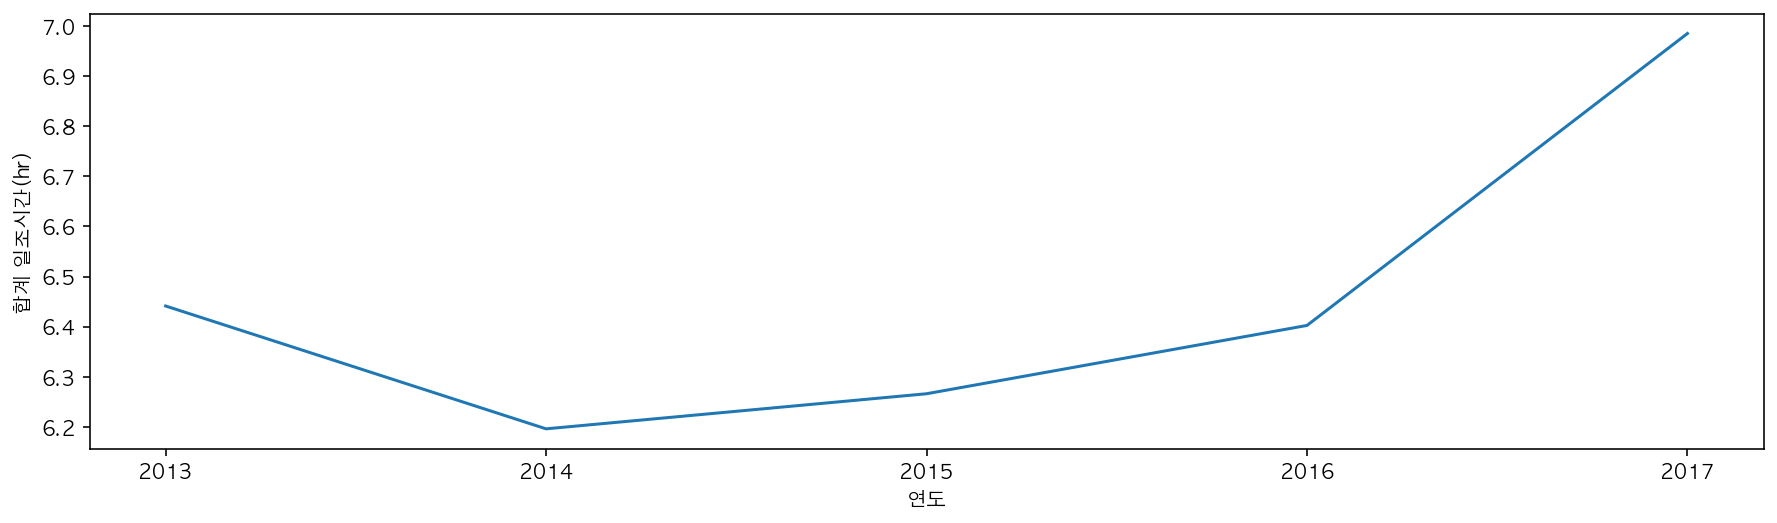

In [42]:
plt.figure(figsize=(15, 4))
plt.xticks((2013, 2014, 2015, 2016, 2017))
sns.lineplot(data=df_tomatoma_g, x='연도', y='합계 일조시간(hr)', ci=None)


<Figure size 1440x288 with 0 Axes>

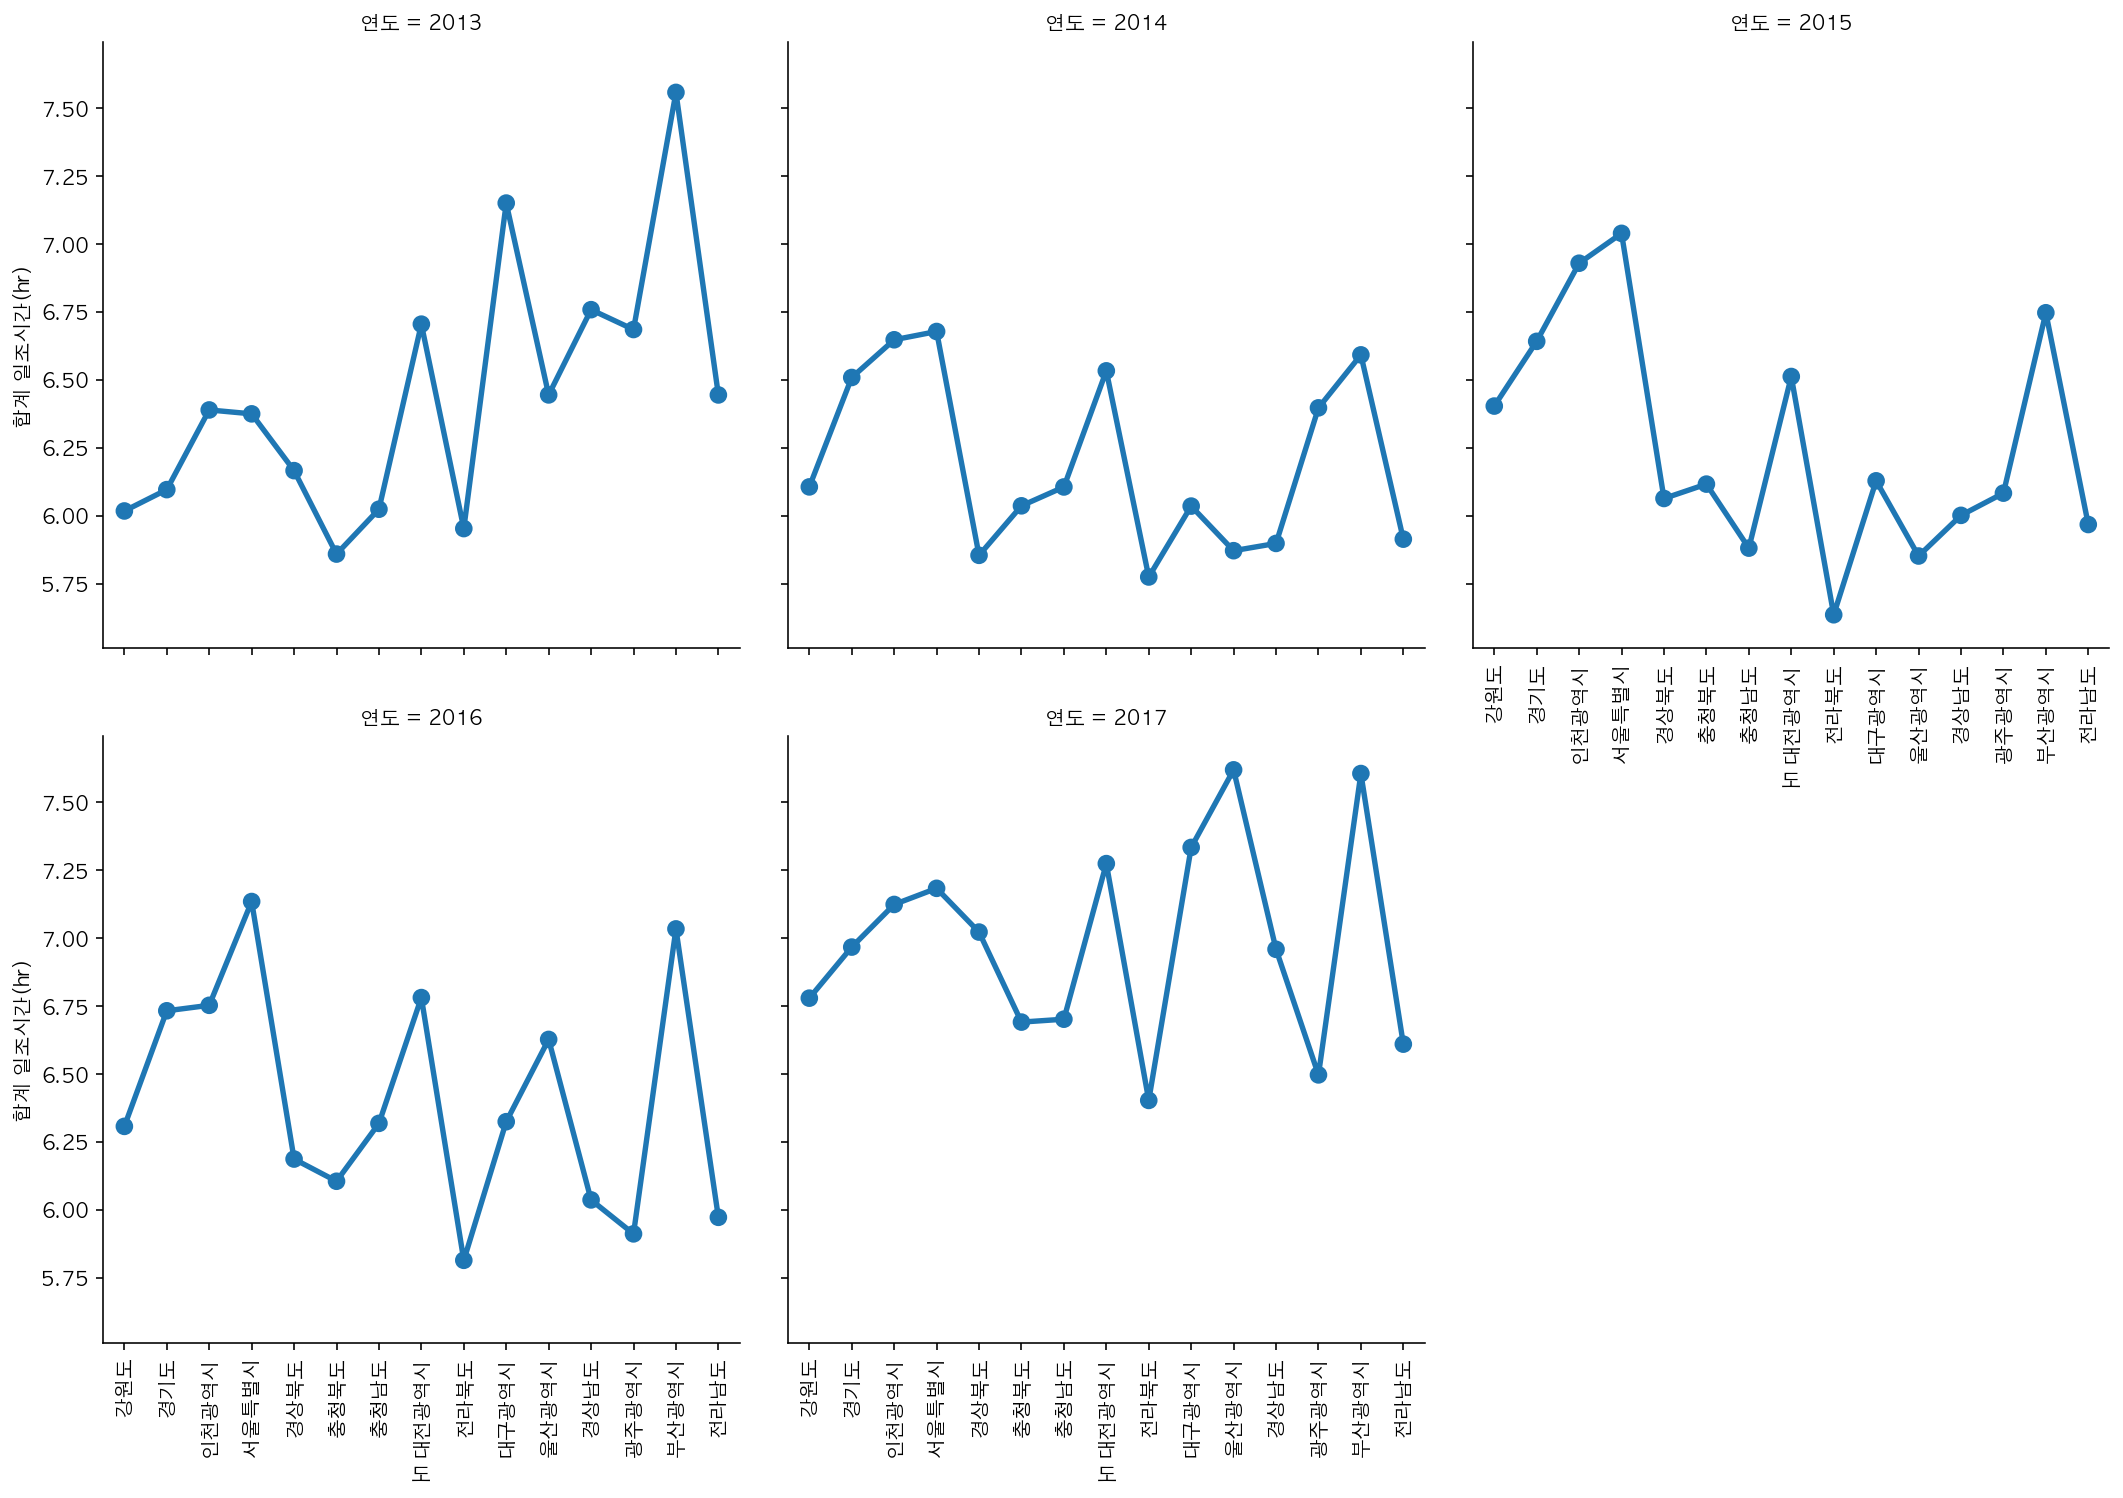

In [98]:
plt.figure(figsize=(20,4))
sns.catplot(data=df_tomatoma_g, x='도', y='합계 일조시간(hr)', col='연도', col_wrap=3, kind='point', 
            ci=None).set_xticklabels(rotation=90)

plt.savefig('연도별_지역별_일조량.png', dpi=300)

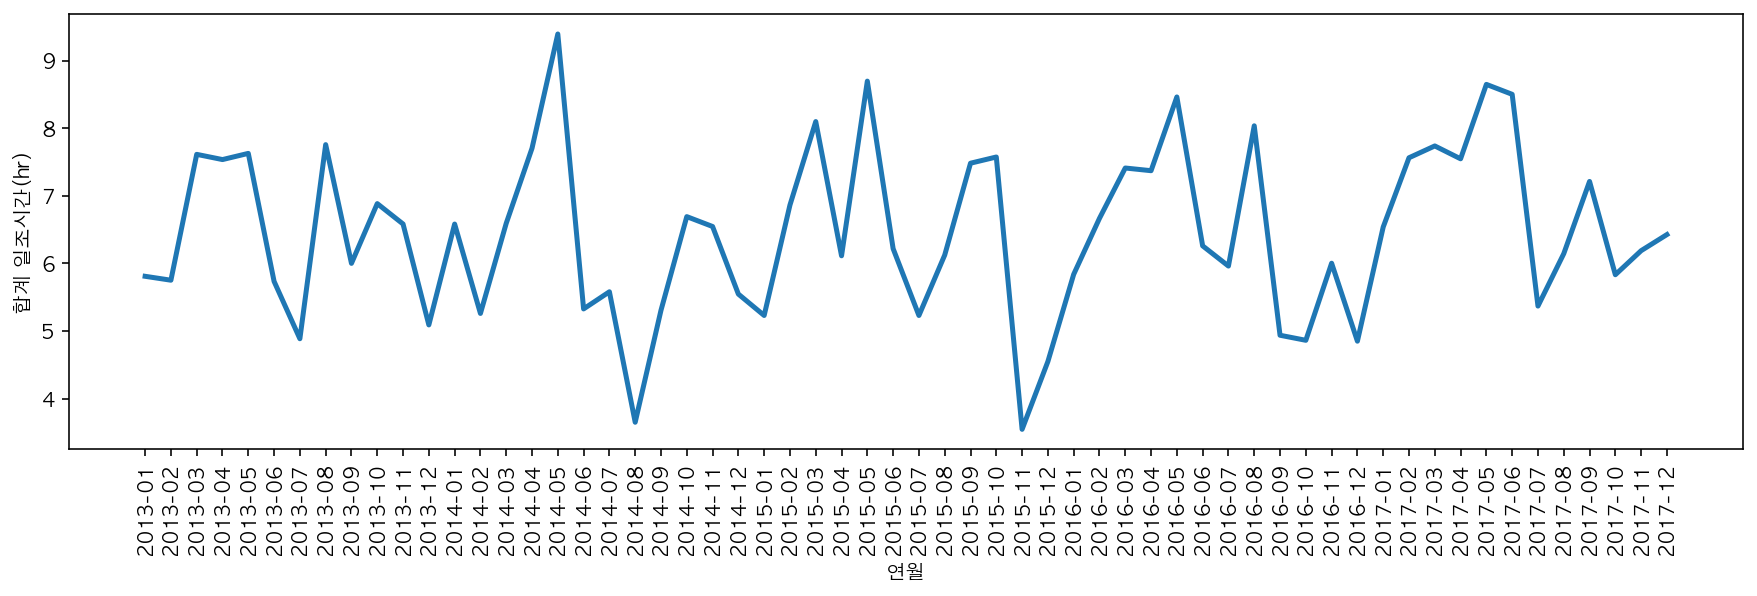

In [853]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=90)
sns.lineplot(data=df_tomatoma_gg, x='연월', y='합계 일조시간(hr)', ci=None, linewidth=2.5)

#### 대기오염

In [800]:
s = df_tomatoma_g[['연도', 'SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25']]
ss = df_tomatoma_gg[['연월', 'SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25']]
sss = df_tomatoma_gg[['일시', 'SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25']]

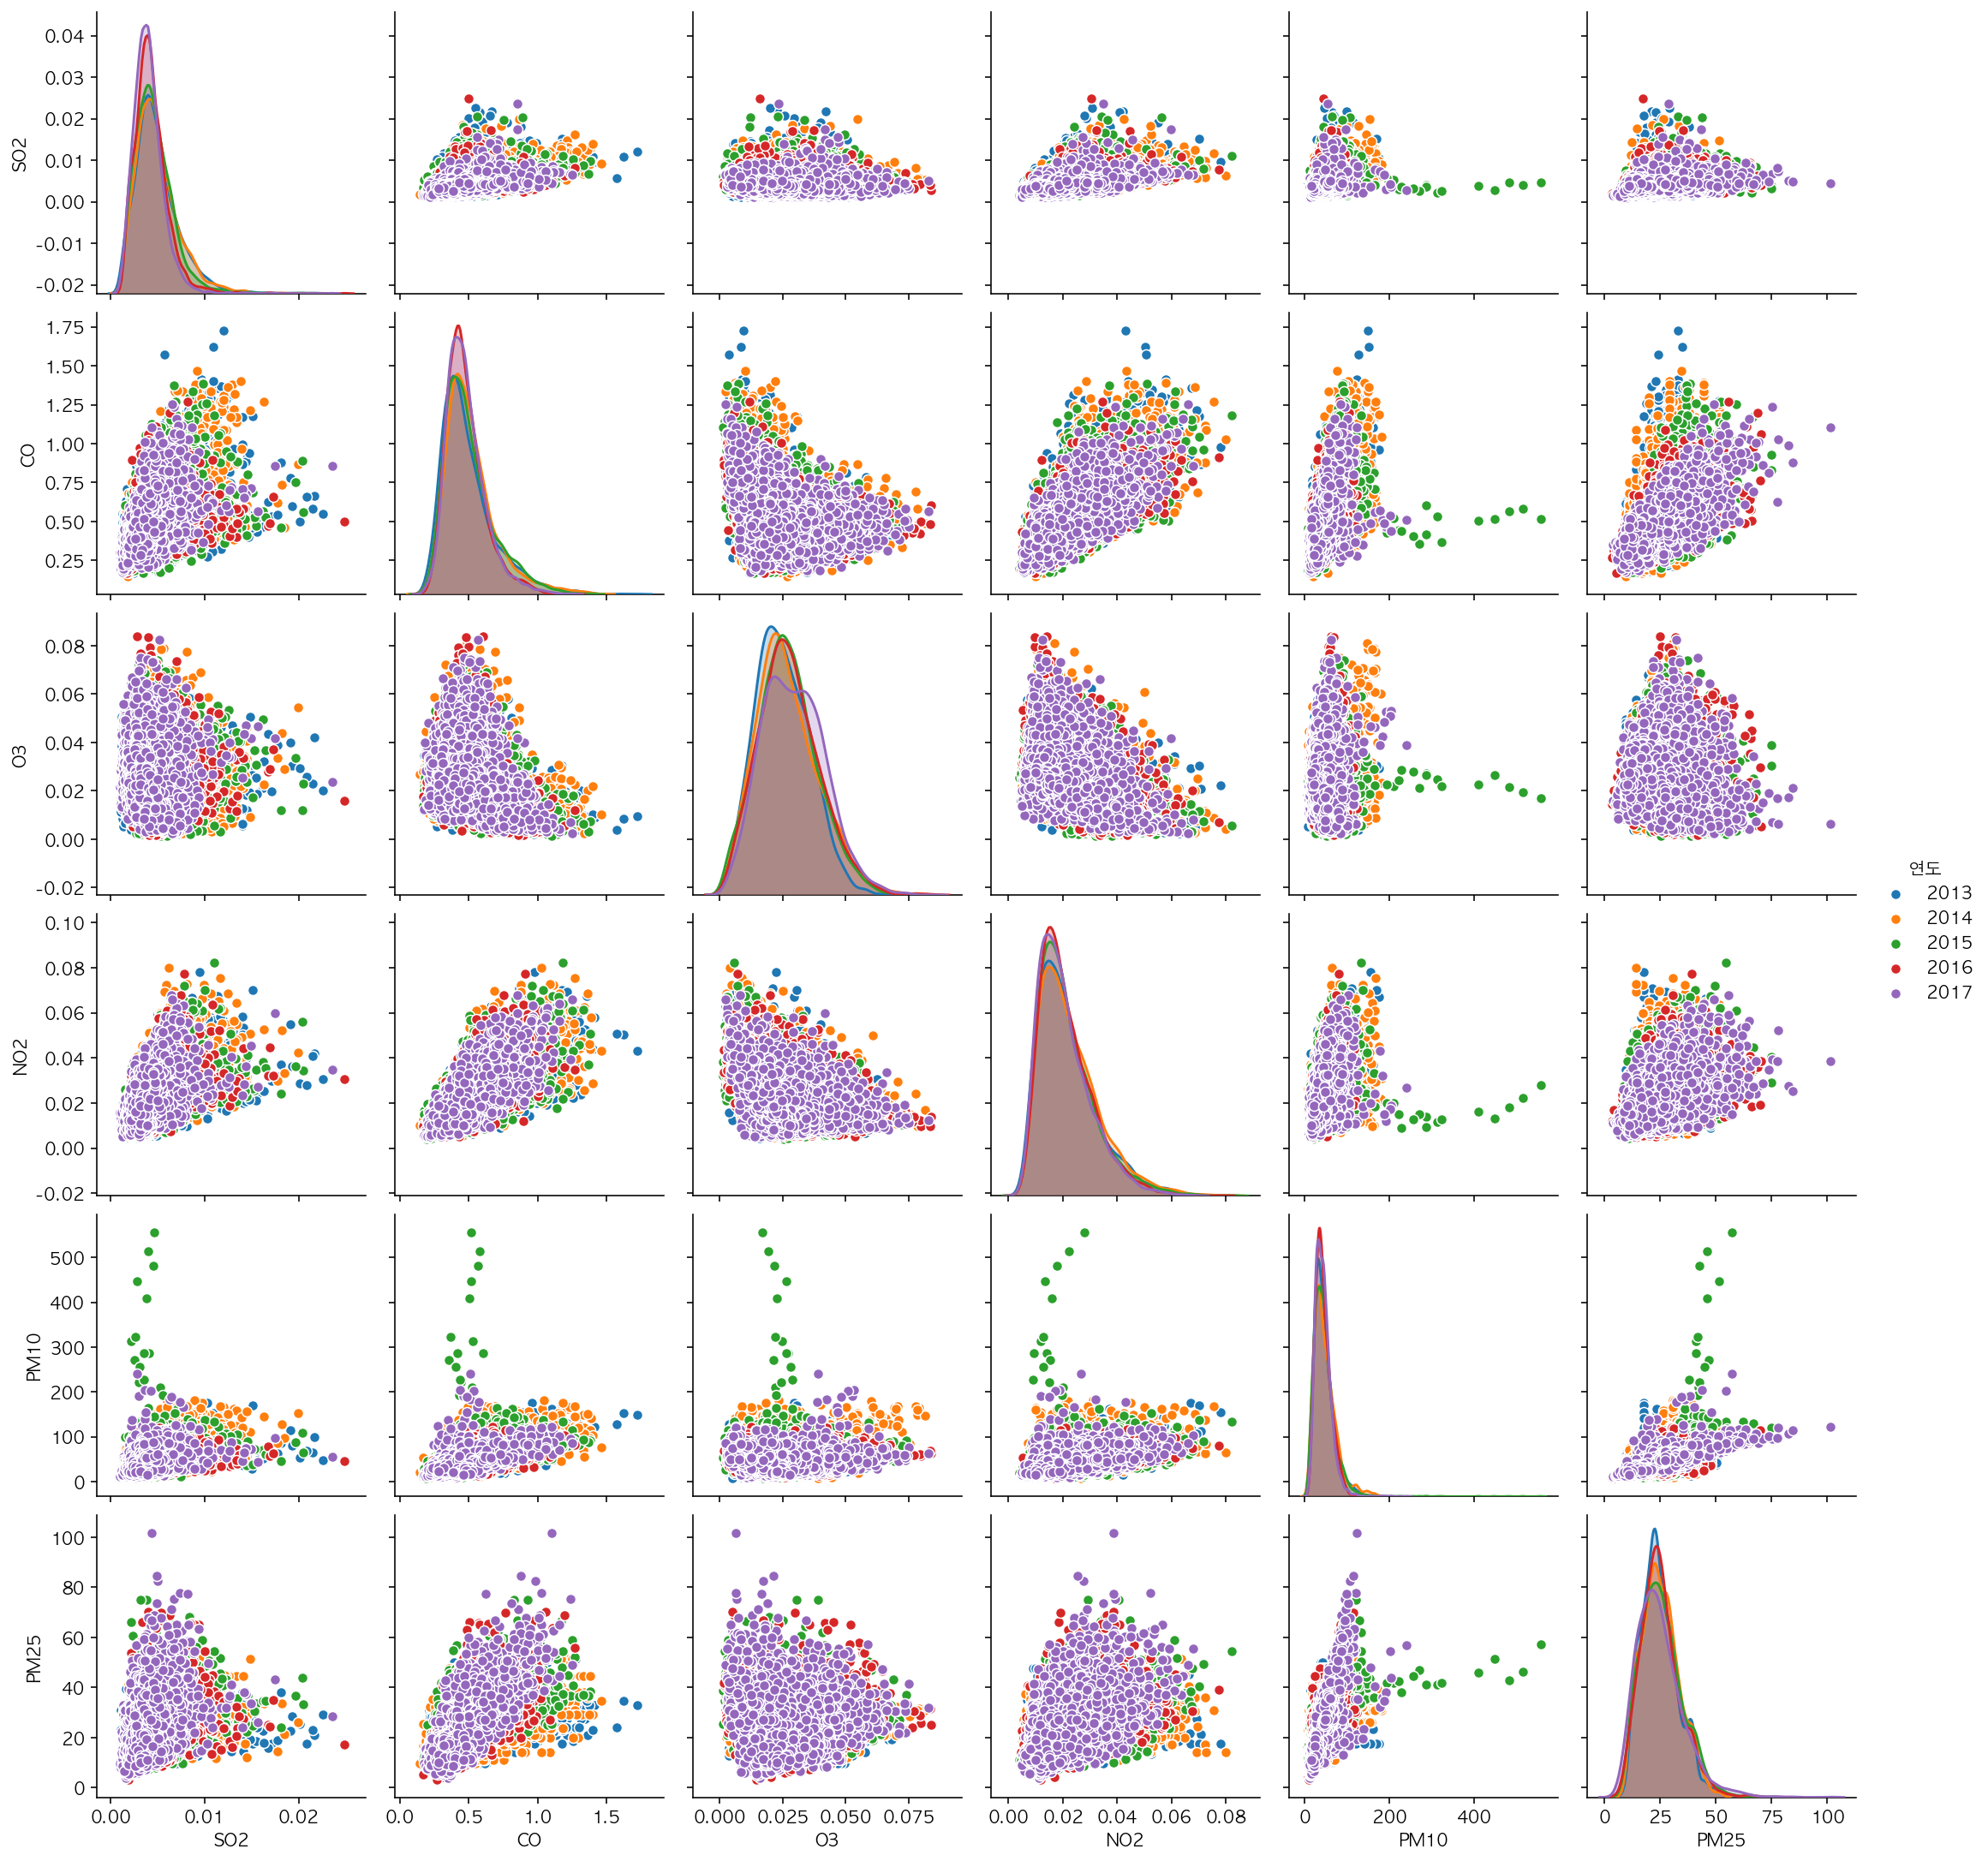

In [692]:
sns.pairplot(s, hue="연도")

In [816]:
ss_1 = ss.groupby(['연월'])['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25'].mean().reset_index()
ss_1

,연월,SO2,CO,O3,NO2,PM10,PM25
0,2013-01,0.006975,0.747950,0.017837,0.029481,58.610980,30.711104
1,2013-02,0.006152,0.621892,0.021484,0.026579,52.423734,28.970468
2,2013-03,0.005671,0.541442,0.028263,0.025499,62.111657,32.878475
3,2013-04,0.004979,0.478316,0.035020,0.022121,53.121658,26.614860
4,2013-05,0.005116,0.438217,0.035983,0.022737,56.223507,24.829054
5,2013-06,0.004624,0.390056,0.032462,0.019239,40.716165,24.237315
6,2013-07,0.003811,0.365686,0.026413,0.013015,35.613091,17.461668
7,2013-08,0.004240,0.402802,0.028833,0.016025,39.090895,16.082869
8,2013-09,0.003757,0.388465,0.023413,0.018522,31.494654,17.108298
9,2013-10,0.003624,0.422959,0.020419,0.020647,35.112157,19.889986


In [823]:
ss_2 = ss_1[['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25']]
ss_2

,SO2,CO,O3,NO2,PM10,PM25
0,0.006975,0.747950,0.017837,0.029481,58.610980,30.711104
1,0.006152,0.621892,0.021484,0.026579,52.423734,28.970468
2,0.005671,0.541442,0.028263,0.025499,62.111657,32.878475
3,0.004979,0.478316,0.035020,0.022121,53.121658,26.614860
4,0.005116,0.438217,0.035983,0.022737,56.223507,24.829054
5,0.004624,0.390056,0.032462,0.019239,40.716165,24.237315
6,0.003811,0.365686,0.026413,0.013015,35.613091,17.461668
7,0.004240,0.402802,0.028833,0.016025,39.090895,16.082869
8,0.003757,0.388465,0.023413,0.018522,31.494654,17.108298
9,0.003624,0.422959,0.020419,0.020647,35.112157,19.889986


In [824]:
values = ss_2.values # 대기오염 수치들만 array로 변경
dates = ss_1['연월']
data = pd.DataFrame(values, index=dates, columns=['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25'])

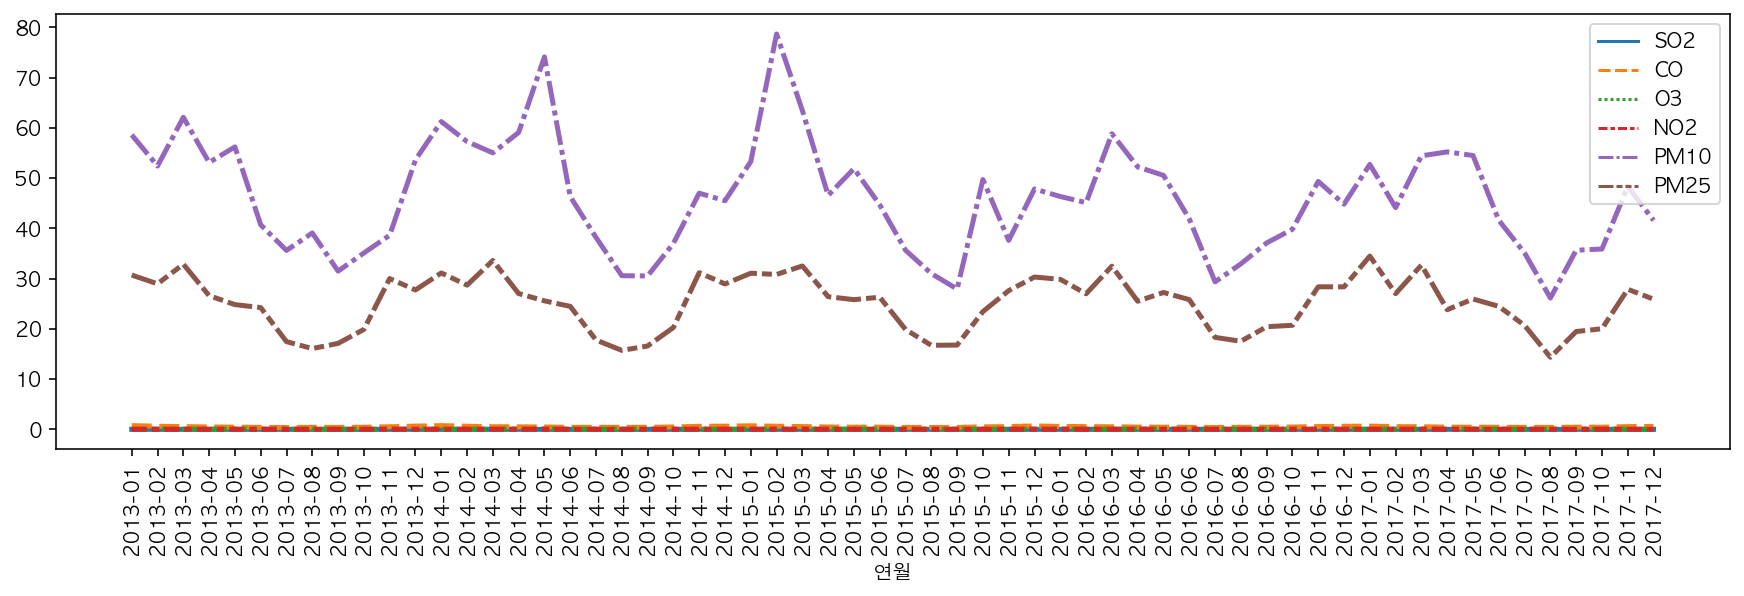

In [827]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=90)
sns.lineplot(data=data, linewidth=2.5)

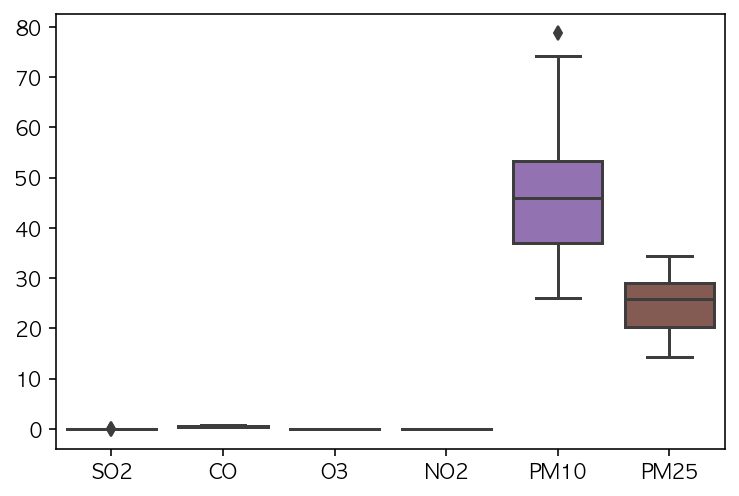

In [846]:
sns.boxplot(data=data)